# Anggota Kelompok:
1. Aura Sukma Aulia (1301213408)
2. Mochammad Daffa Fauzan(1301204065)
3. Adisaputra Nur Arminta (1301210491)

Downloading Streamlit & getting the IP address

In [19]:
!pip install -q streamlit

In [20]:
!wget -q -O - ipv4.icanhazip.com

34.80.213.155


Streamlit dashboard code

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Judul halaman web
st.set_page_config(page_title="Bestseller Books Visualization", layout="wide")

# Judul dashboard
st.title("📚 Bestseller Books Data Visualization")

# Sidebar (file upload & filter)
st.sidebar.header("Upload Dataset")
uploaded_file = st.sidebar.file_uploader("Upload your CSV file", type=["csv"])

if uploaded_file is not None:
    try:
        # Membaca file yang diupload
        df = pd.read_csv(uploaded_file)

        # Memperlihatkan preview dari dataset
        st.subheader("Dataset Preview")
        st.dataframe(df.head())

        # Informasi dari dataset
        st.markdown("<h3 style='color: #6A5ACD;'>📊 Dataset Overview</h3>", unsafe_allow_html=True)
        col1, col2, col3 = st.columns(3)
        col1.metric("Total Rows", f"{df.shape[0]:,}")
        col2.metric("Total Columns", f"{df.shape[1]}")
        if 'Price' in df.columns:
            col3.metric("Average Price", f"${df['Price'].mean():.2f}")

        # Filter genre buku
        st.sidebar.header("Filters")
        if 'Genre' in df.columns:
            unique_genres = df['Genre'].dropna().unique()
            genre_filter = st.sidebar.multiselect("Select Genre(s)", options=unique_genres, default=unique_genres)
            filtered_df = df[df['Genre'].isin(genre_filter)]
        else:
            st.sidebar.warning("The dataset does not contain a 'Genre' column.")
            filtered_df = df

        # Sidebar tambahan untuk jumlah data pada grafik
        st.sidebar.header("🔢 Graph Options")
        num_items = st.sidebar.slider("Select number of items to display", min_value=5, max_value=20, value=10)

        # Visualisasi top author berdasarkan jumlah buku
        if 'Author' in filtered_df.columns:
            st.markdown("<h3 style='color: #FB4141;'>🖊️ Top Authors by Number of Books</h3>", unsafe_allow_html=True)
            top_authors = filtered_df['Author'].value_counts().head(num_items).reset_index()
            top_authors.columns = ['Author', 'Number of Books']
            st.table(top_authors)

            # Bar Chart untuk Top Authors
            fig = px.bar(
                top_authors,
                x='Author',
                y='Number of Books',
                text='Number of Books',
                labels={'Author': 'Author', 'Number of Books': 'Number of Books'},
                color='Number of Books',
                color_continuous_scale='Bluered',
            )
            fig.update_traces(texttemplate='%{text}', textposition='outside')
            fig.update_layout(xaxis_tickangle=-45)
            st.plotly_chart(fig, use_container_width=True)

        # Visualisasi distribusi review buku
        if 'User Rating' in filtered_df.columns:
            st.subheader("⭐ Distribution of User Ratings")
            fig = px.histogram(
                filtered_df,
                x='User Rating',
                nbins=20,
                labels={"User Rating": "User Rating"},
                color_discrete_sequence=['skyblue'],
                marginal="box"
            )
            st.plotly_chart(fig)

        # Visualisasi Distribusi Genre
        if 'Genre' in filtered_df.columns:
            st.markdown("<h3 style='color: #20B2AA;'>📊 Genre Distribution</h3>", unsafe_allow_html=True)
            genre_counts = filtered_df['Genre'].value_counts()
            fig = go.Figure(
                data=[
                    go.Pie(
                        labels=genre_counts.index,
                        values=genre_counts.values,
                        hole=0.4,  # Untuk membuat donut chart
                        textinfo="label+percent",
                        marker=dict(colors=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
                    )
                ]
            )
            fig.update_layout(title="Genre Distribution")
            st.plotly_chart(fig, use_container_width=True)

        # Visualisasi rata-rata harga buku berdasarkan genre
        if 'Genre' in filtered_df.columns and 'Price' in filtered_df.columns:
            st.subheader("⭐ Average Price by Genre")
            avg_price_by_genre = filtered_df.groupby('Genre', as_index=False)['Price'].mean()
            fig = px.bar(
                avg_price_by_genre,
                x='Genre',
                y='Price',
                labels={"Genre": "Genre", "Price": "Average Price"},
                color='Price',
                color_continuous_scale="sunsetdark"
            )
            st.plotly_chart(fig)

        # Visualisasi rating buku dibandingkan dengan harganya
        if 'User Rating' in filtered_df.columns and 'Price' in filtered_df.columns:
            st.subheader("📊 User Ratings vs Price")
            fig = px.scatter(
                filtered_df,
                x='Price',
                y='User Rating',
                color='Genre' if 'Genre' in filtered_df.columns else None,
                labels={"Price": "Price", "User Rating": "User Rating"},
                hover_data=['Author', 'Title'] if 'Title' in filtered_df.columns else ['Author'],
            )
            st.plotly_chart(fig)

    except Exception as e:
        st.error(f"An error occurred while processing the file: {e}")
else:
    st.write("Please upload a dataset to proceed.")

# Instruksi untuk sidebar
st.sidebar.write("Ensure your dataset includes relevant columns like 'Genre', 'Author', 'User Rating', and 'Price'.")
st.sidebar.info("Use the filters to customize visualizations.")

2024-12-24 14:45:05.939 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:45:05.942 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:45:06.158 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-24 14:45:06.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:45:06.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:45:06.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 14:45:06.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.213.155:8501

⠦⠧⠇your url is: https://curly-mugs-allow.loca.lt


Notes:
1. Jika web dari url meminta password, masukan IP (hasil code baris 2)
2. Jika web error, refresh terus sampai web kembali responsif
3. Jika hasil graph/file input dari web error, refresh juga web sampai tidak terjadi error lagi

Contoh web yang gagal diakses:

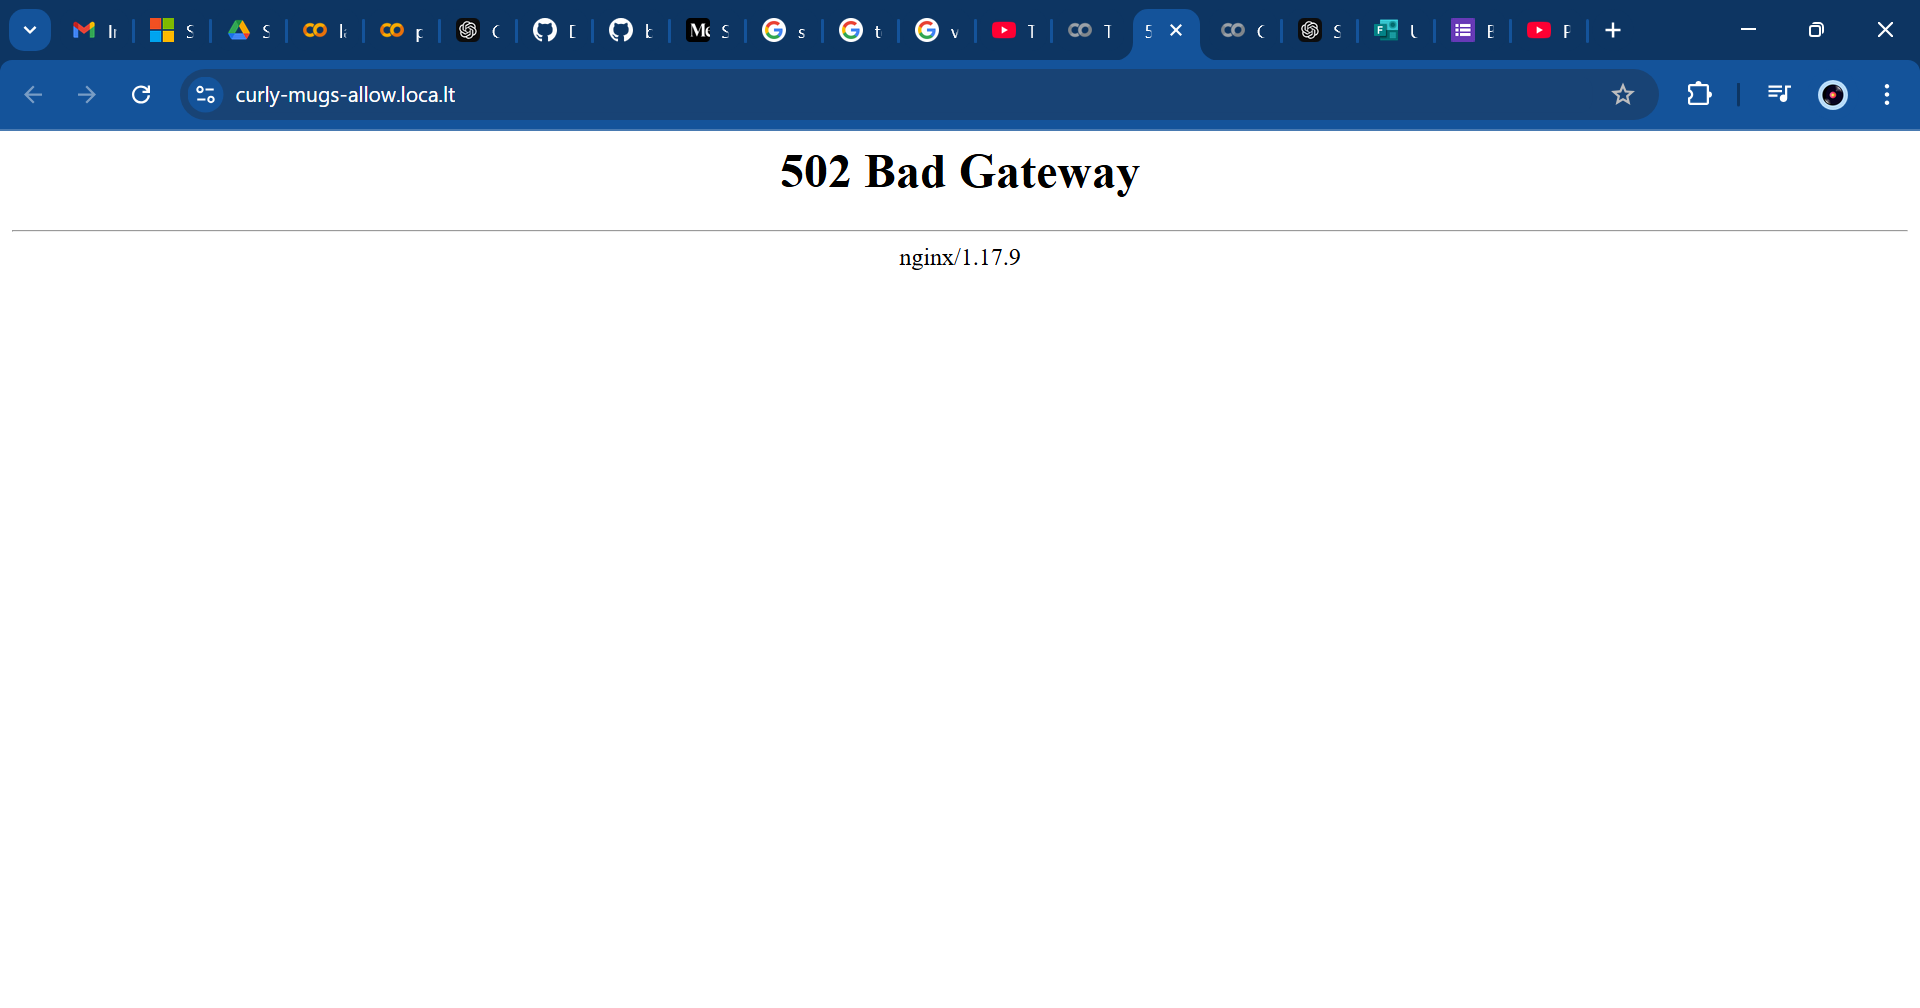

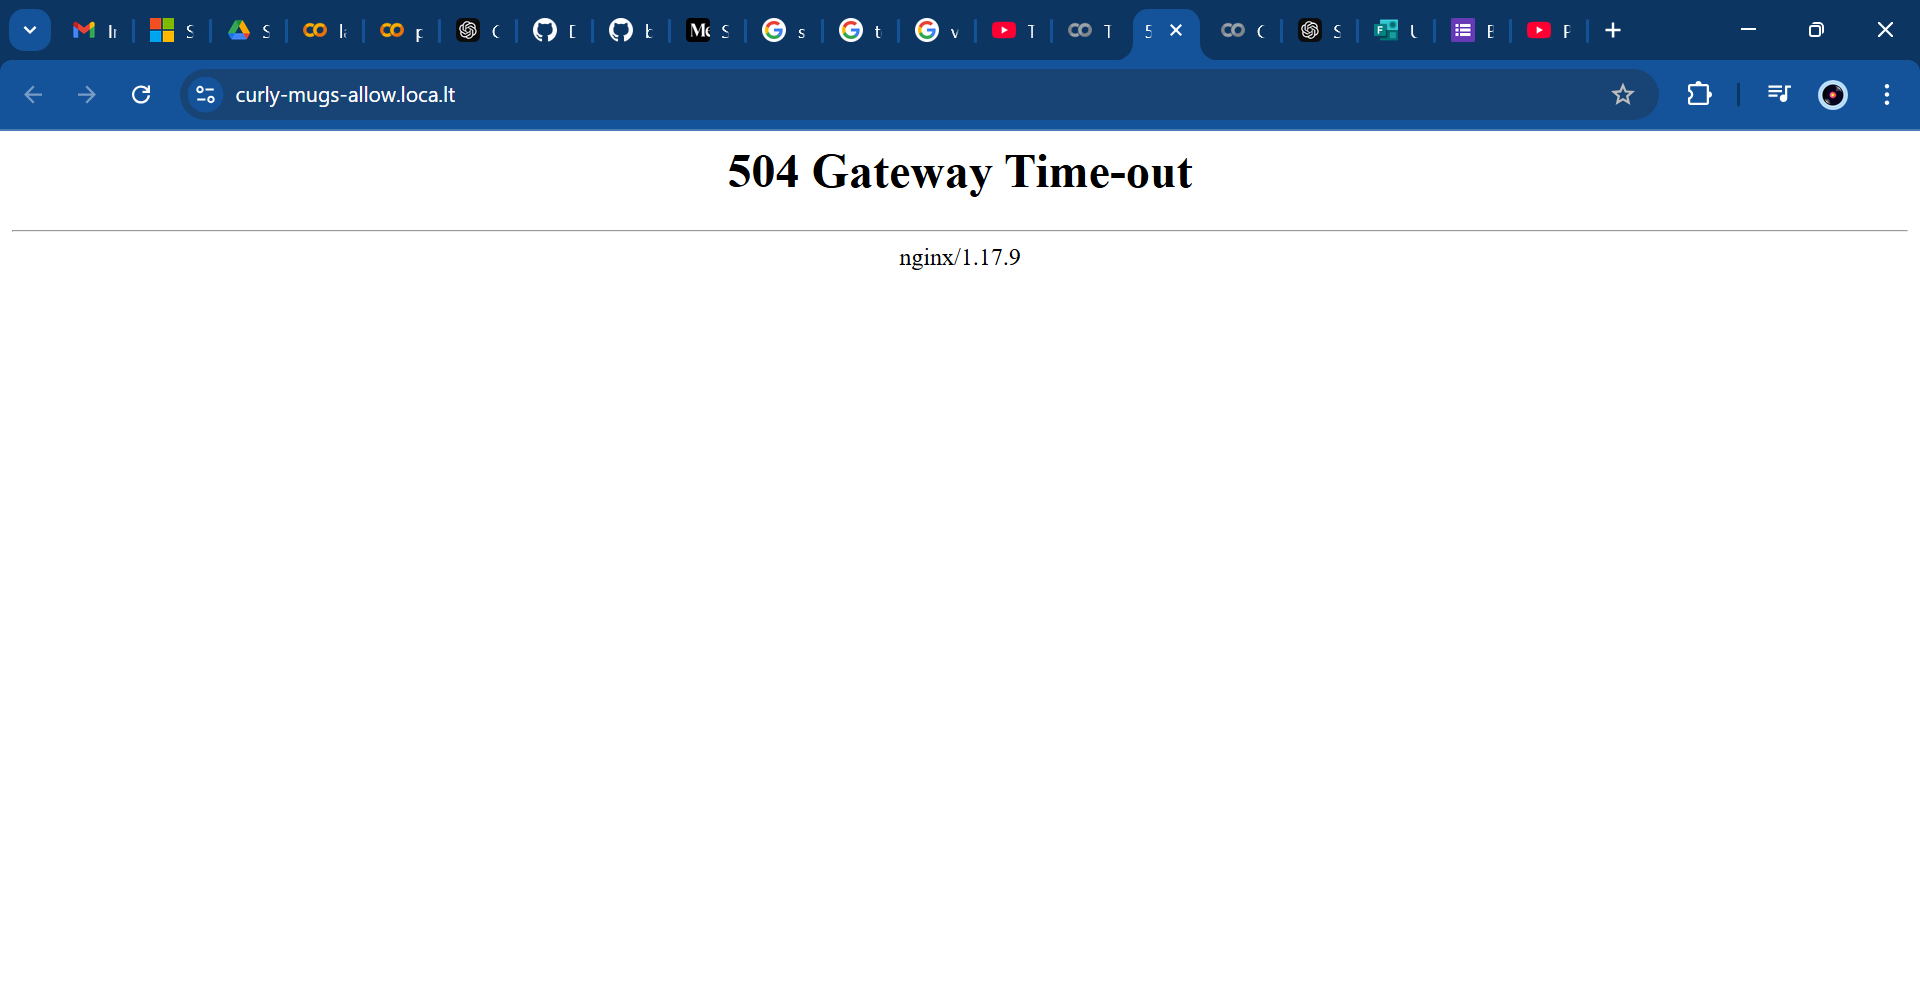

Contoh web yang berhasil diakses namun memerlukan password:

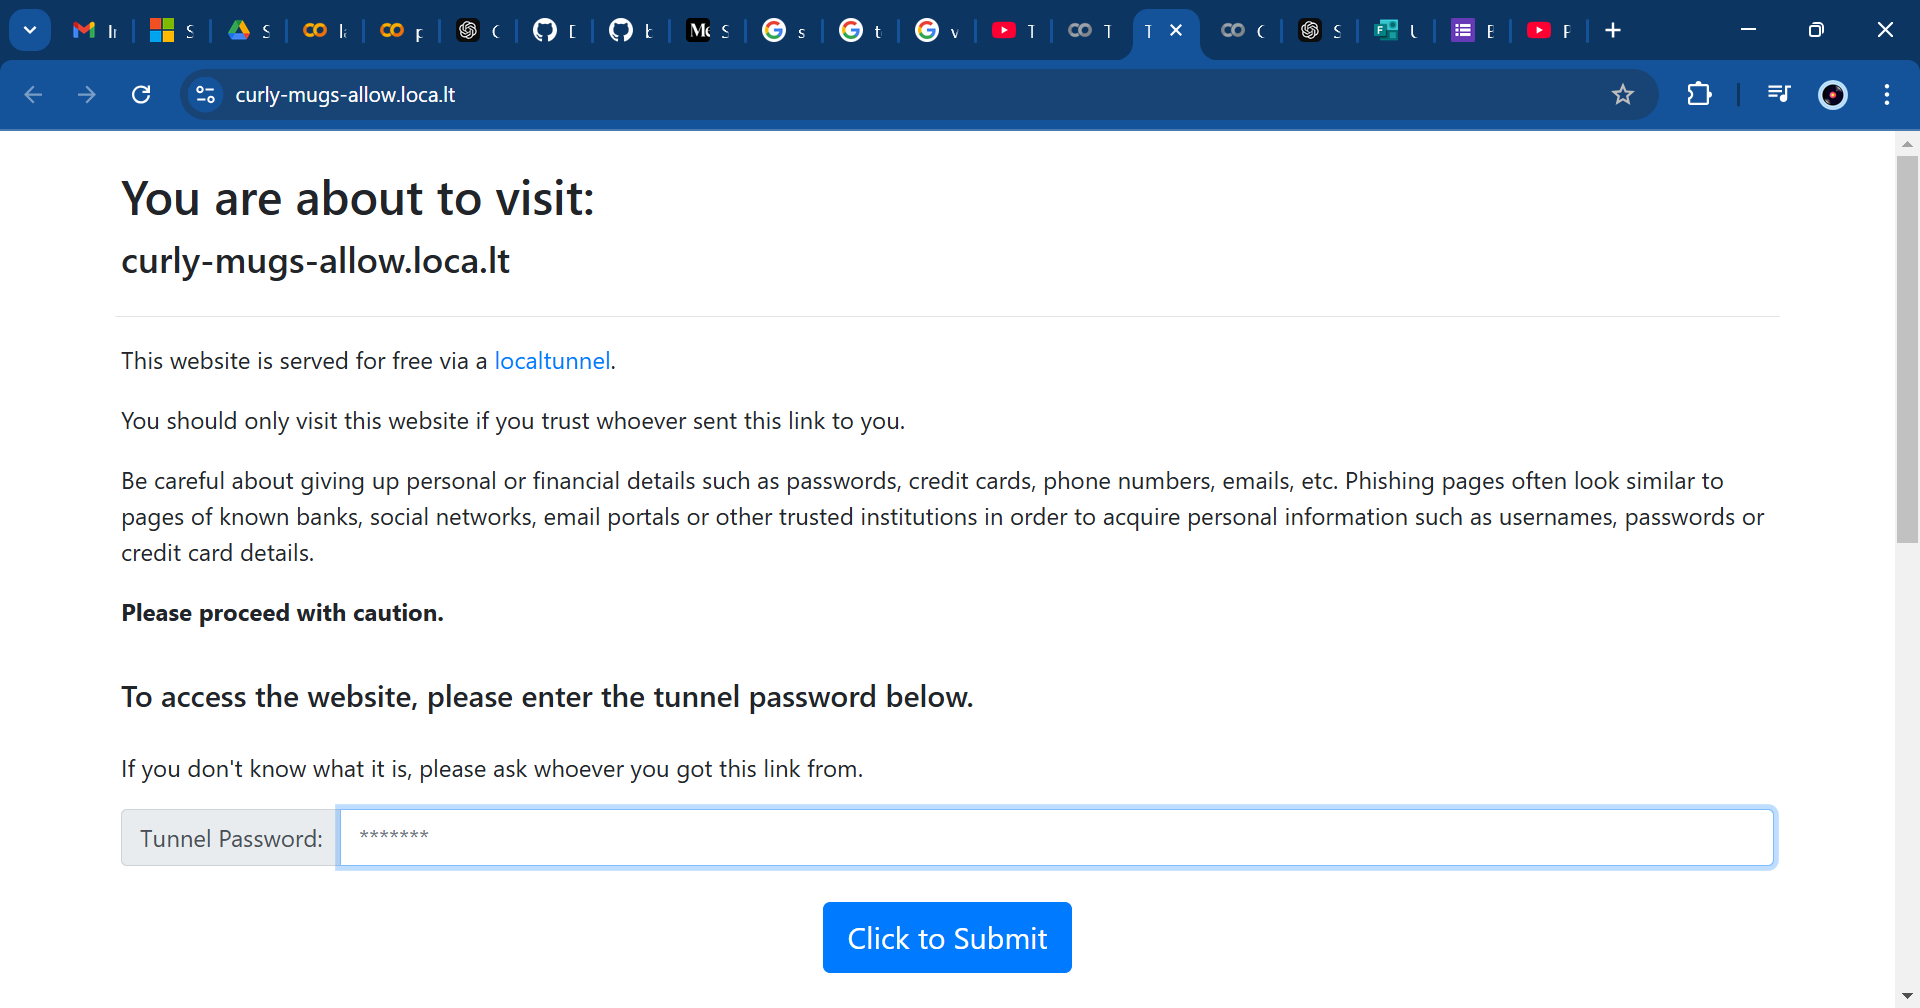

Contoh web yang berhasil diakses: